In [1]:
import yt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [2]:
ds = yt.load("Enzo_64/DD0043/data0043")

yt : [INFO     ] 2021-03-22 17:51:55,992 Parameters: current_time              = 645.81707236914
yt : [INFO     ] 2021-03-22 17:51:55,992 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2021-03-22 17:51:55,993 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-03-22 17:51:55,993 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-03-22 17:51:55,994 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-03-22 17:51:55,994 Parameters: current_redshift          = 0.0013930880640796
yt : [INFO     ] 2021-03-22 17:51:55,994 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2021-03-22 17:51:55,995 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2021-03-22 17:51:55,995 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-03-22 17:51:55,995 Parameters: hubble_constant           = 0.71


# using plot_surface

In [3]:
slices = [
    ds.slice(0,0.5),
    ds.slice(1,0.25),
    ds.slice(2,0.),
]

yt_cm = yt.visualization.color_maps.colormaps['dusk']


In [4]:
use_bride = len(slices) > 1

minval = np.inf
maxval = -np.inf

# store all the surface pieces
surfaces = []
resolution = (300, 300)
fld = ('gas', 'density')
for slc in slices:
    slice_val = slc.coord
    frb = slc.to_frb(1, resolution)
    
    dim_vals = [frb[dim] for dim in ['x', 'y', 'z']]
    dim_vals[frb.axis] = np.full(dim_vals[frb.axis].shape, 
                                 dim_vals[frb.axis].mean())
    vals = frb[fld]
    minval = min(minval, vals.min())
    maxval = max(maxval, vals.max())
    surfaces.append(dim_vals + [vals, ])
    
    
# norm = cm.colors.LogNorm(minval, maxval)
norm = cm.colors.LogNorm(minval, 1e-29)

# assemble the pieces, with transparent connections
X_pieces = []
Y_pieces = []
Z_pieces = []
C_pieces = []

for isurf, surf in enumerate(surfaces):

    X_pieces.append(surf[0])
    Y_pieces.append(surf[1])
    Z_pieces.append(surf[2])
    C_pieces.append(yt_cm(norm(surf[3])))

    if isurf < len(slices) - 1:
        # add a transparent connection between this and the next piece      

        X, Y, Z = surf[0], surf[1], surf[2]
        surfp = surfaces[isurf+1]
        Xp, Yp, Zp = surfp[0], surfp[1], surfp[2]

        Xc = np.vstack([X[-1,:],Xp[0,:]])
        Yc = np.vstack([Y[-1,:],Yp[0,:]])
        Zc = np.vstack([Z[-1,:],Zp[0,:]])
        Cc = np.full(Zc.shape + (4,), [1,1,1,0])

        X_pieces.append(Xc)
        Y_pieces.append(Yc)
        Z_pieces.append(Zc)
        C_pieces.append(Cc)
            

# join the datasets
X_surf = np.vstack(X_pieces)
Y_surf = np.vstack(Y_pieces)
Z_surf = np.vstack(Z_pieces)
C_surf = np.vstack(C_pieces)       

yt : [INFO     ] 2021-03-22 17:51:56,010 Making a fixed resolution buffer of (x) 300 by 300
Parsing Hierarchy : 100%|█████████▉| 751/752 [00:00<00:00, 16850.18it/s]
yt : [INFO     ] 2021-03-22 17:51:56,075 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2021-03-22 17:51:57,431 Making a fixed resolution buffer of (y) 300 by 300
yt : [INFO     ] 2021-03-22 17:51:57,436 Making a fixed resolution buffer of (z) 300 by 300
yt : [INFO     ] 2021-03-22 17:51:57,440 Making a fixed resolution buffer of (('gas', 'density')) 300 by 300
yt : [INFO     ] 2021-03-22 17:51:57,446 Making a fixed resolution buffer of (x) 300 by 300
yt : [INFO     ] 2021-03-22 17:51:57,472 Making a fixed resolution buffer of (y) 300 by 300
yt : [INFO     ] 2021-03-22 17:51:57,478 Making a fixed resolution buffer of (z) 300 by 300
yt : [INFO     ] 2021-03-22 17:51:57,485 Making a fixed resolution buffer of (('gas', 'density')) 300 by 300
yt : [INFO     ] 2021-03-22 17:51:57,495 Making a fixed resolution 

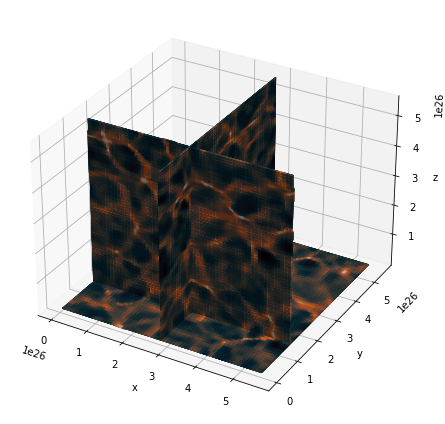

In [5]:
fig, ax = plt.subplots(figsize=(6, 6),
                       subplot_kw={'projection': '3d'})


ax.plot_surface(X_surf, Y_surf, Z_surf, facecolors=C_surf, rstride=1, cstride=1)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()
plt.show()

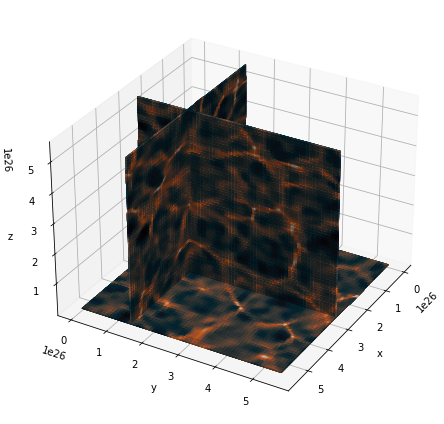

In [9]:
fig, ax = plt.subplots(figsize=(6, 6),
                       subplot_kw={'projection': '3d'})


ax.plot_surface(X_surf, Y_surf, Z_surf, facecolors=C_surf, rstride=1, cstride=1)
ax.azim = 30
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()
plt.show()